
Uber and Lyft Dataset Boston, MA | Kaggle (57 columns, 60k rows)
https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Uber Fares Dataset | Kaggle (9 columns, 200k rows)
https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
!pip install -q kaggle
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas as pd
import numpy as np
import os
from google.colab import drive
from kaggle.api.kaggle_api_extended import KaggleApi

drive.mount('/content/drive')

In [3]:
od.download("https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma")
os.chdir('/content/uber-and-lyft-dataset-boston-ma')
uber_df = pd.read_csv("rideshare_kaggle.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 44.5M/44.5M [00:00<00:00, 99.8MB/s]


In [4]:
od.download("https://www.kaggle.com/datasets/yasserh/uber-fares-dataset")
os.chdir('/content/uber-and-lyft-dataset-boston-ma/uber-fares-dataset')
df = pd.read_csv("uber.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 7.04M/7.04M [00:00<00:00, 63.6MB/s]

In [5]:
od.download("https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021")
os.chdir('/content/uber-and-lyft-dataset-boston-ma/uber-fares-dataset/us-gasoline-and-diesel-retail-prices-19952021/')
gas_price_df = pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 38.2k/38.2k [00:00<00:00, 23.4MB/s]

In [9]:
od.download("https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=hyundi.csv")
os.chdir('/content/uber-and-lyft-dataset-boston-ma/uber-fares-dataset/us-gasoline-and-diesel-retail-prices-19952021/used-car-dataset-ford-and-mercedes')

Skipping, found downloaded files in "./used-car-dataset-ford-and-mercedes" (use force=True to force download)


{"username":"blakeandersonw","key":"5c7b7542c5ad7af0d6015b98bfa868b4"}



In [10]:
# create an instance of the Kaggle API client
api = KaggleApi()
api.authenticate()

In [11]:
# specify the download directory
output_dir = '/content/downloads'

In [12]:
# download the datasets to the specified directory
api.dataset_download_files(dataset='yasserh/uber-fares-dataset', path=output_dir, unzip=True)
api.dataset_download_files(dataset='brllrb/uber-and-lyft-dataset-boston-ma', path=output_dir, unzip=True)
api.dataset_download_files(dataset='mruanova/us-gasoline-and-diesel-retail-prices-19952021', path=output_dir, unzip=True)
api.dataset_download_files(dataset='adityadesai13/used-car-dataset-ford-and-mercedes', path=output_dir, force=True, unzip=True, quiet=False)


100%|██████████| 1.10M/1.10M [00:00<00:00, 103MB/s]

### **MPG vs. Car Make & Model**

---

This data will be used when we make use of our cost function in order to accurately predict how much it will cost each driver to drive for Rideshare companies.

In [13]:
os.chdir('/content/downloads')

In [14]:
# Download the different car companies' data
# Clean the data
# Delete any unused columns

from IPython.core.formatters import format_display_data
import pandas as pd
import numpy as np

audi_data1 = pd.read_csv("audi.csv")
bmw_data1 = pd.read_csv("bmw.csv")
ford_data1 = pd.read_csv("ford.csv")
hyundai_data1 = pd.read_csv("hyundi.csv")
merc_data1 = pd.read_csv("merc.csv")
skkoda_data1 = pd.read_csv("skoda.csv")
toyota_data1 = pd.read_csv("toyota.csv")
vauxhall_data1 = pd.read_csv("vauxhall.csv")
vw_data1 = pd.read_csv("vw.csv")

In [15]:
# delete extra columns
audi_data = audi_data1.drop(columns=['transmission', 'tax', 'engineSize'])
bmw_data = bmw_data1.drop(columns=['transmission', 'tax', 'engineSize'])
ford_data = ford_data1.drop(columns=['transmission', 'tax', 'engineSize'])
hyundai_data = hyundai_data1.drop(columns=['transmission', 'tax(£)', 'engineSize'])
merc_data = merc_data1.drop(columns=['transmission', 'tax', 'engineSize'])
skkoda_data = skkoda_data1.drop(columns=['transmission', 'tax', 'engineSize'])
toyota_data = toyota_data1.drop(columns=['transmission', 'tax', 'engineSize'])
vauxhall_data = vauxhall_data1.drop(columns=['transmission', 'tax', 'engineSize'])
vw_data = vw_data1.drop(columns=['transmission', 'tax', 'engineSize'])

# adding the company to all the dataframes
audi_data['carType'] = "Audi"
bmw_data['carType'] = "BMW"
ford_data['carType'] = "Ford"
hyundai_data['carType'] = "Hyundai"
merc_data['carType'] = "Mercedes"
skkoda_data['carType'] = "Skkoda"
toyota_data['carType'] = "Toyota"
vauxhall_data['carType'] = "Vauxhall"
vw_data['carType'] = "Volkswagen"

# reorder columns
audi_data = audi_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
bmw_data = bmw_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
ford_data = ford_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
hyundai_data = hyundai_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
merc_data = merc_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
skkoda_data = skkoda_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
toyota_data = toyota_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
vauxhall_data = vauxhall_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]
vw_data = vw_data[['carType', 'model', 'year', 'mpg', 'fuelType', 'price', 'mileage']]

# check for any NaN inputs
#audi_data.isnull().any()
bmw_data.isnull().any()
ford_data.isnull().any()
hyundai_data.isnull().any()
merc_data.isnull().any()
skkoda_data.isnull().any()
toyota_data.isnull().any()
vauxhall_data.isnull().any()
vw_data.isnull().any()

carType     False
model       False
year        False
mpg         False
fuelType    False
price       False
mileage     False
dtype: bool

In [16]:
# Merge the different data tables into one complete table
# Get the average MPG by car make, model, and year

merge_items = ["carType", "model", "year", "mpg", "fuelType", 'price', 'mileage']

# merge all the dataframes
cars_outer = audi_data.merge(bmw_data, on=merge_items, how="outer").merge(
    ford_data, on=merge_items, how="outer").merge(hyundai_data, on=merge_items, how="outer").merge(
        merc_data, on=merge_items, how="outer").merge(skkoda_data, on=merge_items, how="outer").merge(
            toyota_data, on=merge_items, how="outer").merge(vauxhall_data, on=merge_items, how="outer").merge(
                vw_data, on=merge_items, how="outer")

# random sample from merged dataframe
cars_outer = cars_outer.sample(n=200)

cars_outer

# Groupby car make, model, and year to get the average MPG
# Plot to see distribution of mpg amongst random car makes and models
# cars_outer.groupby(['carType', 'model', 'year'])[['mpg']].mean().plot.hist(bins=25)

,carType,model,year,mpg,fuelType,price,mileage
86045,Volkswagen,Golf,2019,47.1,Petrol,17298,11217
61338,Skkoda,Fabia,2016,58.9,Petrol,9995,25503
69368,Toyota,C-HR,2017,47.1,Petrol,16995,28973
76997,Vauxhall,Viva,2018,46.3,Petrol,7999,12731
29336,Ford,Focus,2015,74.3,Diesel,8400,43265
...,...,...,...,...,...,...,...
26295,Ford,Focus,2015,61.4,Petrol,7990,27792
66339,Toyota,Yaris,2017,86.0,Hybrid,13491,2450
80067,Vauxhall,Crossland X,2018,78.5,Diesel,10995,16800
50288,Mercedes,E Class,2019,48.7,Diesel,39480,3341


In [28]:
def calculate_total_expected_cost():
    carType = input("Enter the car type (Audi/BMW/Ford/Mercedes/Hyundai/Skkoda/Toyota/Vauxhall/Volkswagon): ")
    
    models = list(cars_outer.loc[cars_outer['carType'] == carType, 'model'].unique())

    if len(models) == 0:
        print("No cars of the selected make found in the dataset.")
        return
    print("Available models for selected car type: ", models)
    
    model = input("Enter the car's model: ")

    while model not in models:
        print("Invalid model. Please select from the available models: ", models)
        model = input("Enter the car's model: ")

    year = int(input("Enter the car's year: "))

    mileage = cars_outer.loc[(cars_outer['model'] == model) & (cars_outer['year'] == year) & (cars_outer['carType'] == carType), 'mileage'].values[0]
    
    mpg = cars_outer.loc[(cars_outer['model'] == model) & (cars_outer['year'] == year) & (cars_outer['carType'] == carType), 'mpg'].values[0]
    
    fuel_type = cars_outer.loc[(cars_outer['model'] == model) & (cars_outer['year'] == year) & (cars_outer['carType'] == carType), 'fuelType'].values[0]
    
    price = cars_outer.loc[(cars_outer['model'] == model) & (cars_outer['year'] == year) & (cars_outer['carType'] == carType), 'price'].values[0]

    fuel_cost = mileage / mpg * {'Petrol': 2.8, 'Diesel': 3.1, 'Hybrid': 2.5}[fuel_type]
    age = 2023 - year
    depreciation_cost = price * (1 - 0.01 * age) / (mileage + 1)
    maintenance_cost = 0.01 * mileage + 0.005 * age * price
    total_cost = fuel_cost + depreciation_cost + maintenance_cost
    
    return (total_cost)

In [31]:
calculate_total_expected_cost()

Enter the car type (Audi/BMW/Ford/Mercedes/Hyundai/Skkoda/Toyota/Vauxhall/Volkswagon): Audi
Available models for selected car type:  [' A4', ' A1', ' A5', ' A3', ' Q2', ' A6']
Enter the car's model:  A4
Enter the car's year: 2019


1267.8204984179335

#
 Not Needed

In [ ]:
# Display the resulting dataset
print(cars_outer[['carType', 'total_cost', 'model', 'year', 'price', 'mileage', 'mpg', 'fuelType']])

Gas prices --> https://www.eia.gov/petroleum/gasdiesel/

In [ ]:
# Calculate fuel cost
cars_outer['fuel_cost'] = cars_outer['mileage'] / cars_outer['mpg'] * cars_outer['fuelType'].map(
    {'Petrol': 2.8, 'Diesel': 3.1, 'Hybrid': 2.5}) 

In [ ]:
# Calculate car depreciation cost
cars_outer['age'] = 2023 - cars_outer['year']
cars_outer['depreciation_cost'] = cars_outer['price'] * (1 - 0.01 * cars_outer['age']) / (cars_outer['mileage'] + 1)

In [ ]:
# Calculate maintenance cost
cars_outer['maintenance_cost'] = 0.01 * cars_outer['mileage'] + 0.005 * cars_outer['age'] * cars_outer['price']

In [ ]:
# Calculate total expected cost
cars_outer['total_cost'] = cars_outer['fuel_cost'] + cars_outer['depreciation_cost'] + cars_outer['maintenance_cost']

In [ ]:
# data set of uber data
os.chdir('/content/downloads')
data = pd.read_csv("uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Downloading dataset above, consists of 200000 uber rides, with important variables pickup/dropoff longitude/latitude, price, and datetime.

We likely will not use this dataset until later on.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### **LEARNING ABOUT THE DATASETS**



In [ ]:
# data set of uber and lyft data
os.chdir('/content/downloads')
rs_data = pd.read_csv("rideshare_kaggle.csv")
rs_data

Downloading ridehsare data from Boston, MA during November 26, 2018 until December 18, 2018.  Comprehensive dataset with price, distance, pickup/dropoff, weather, etc.

In [ ]:
rs_data.dtypes

Checking variable types of dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# summary statistics on Lyft and Uber 
lyft_prices = rs_data.loc[rs_data["cab_type"] == "Lyft"]['price']
uber_prices = rs_data.loc[rs_data["cab_type"] == "Uber"]['price']

print('Lyft summary statistics\n', lyft_prices.describe(),'\n')
print('Uber summary statistics\n', uber_prices.describe())


Summary statistics of Uber vs Lyft prices - not super relevant, just interesting.

In [ ]:
def ride_cost(distance, mpg):
  gasoline_cost = (distance / (mpg/2))*3
  maintenance_cost = .10*distance
  depreciable_cost = .10*distance
  total_cost = gasoline_cost + maintenance_cost + depreciable_cost
  return(total_cost)

ridecost = []

for i in rs_data['distance']:
  ridecost.append(ride_cost(i, 20))

rs_data['ridecost'] = ridecost
rs_data['profit'] = rs_data['price'] - rs_data['ridecost']
pricesdata = rs_data[['price','ridecost','profit']]
pricesdata

Barebones cost function implemented into a table containing price, ridecost, and expected profit.  Major improvements coming to this function in the future.

# Not Needed

In [ ]:

# Calculate fuel cost
df['fuel_cost'] = df['mileage'] / df['mpg'] * df['fuelType'].map(
    {'Petrol': 2.8, 'Diesel': 3.1, 'Hybrid': 2.5}) 
#assuming fuel prices in $USD

# Calculate car depreciation cost
df['age'] = 2023 - df['year']
df['depreciation_cost'] = df['price'] * (1 - 0.01 * df['age']) / (df['mileage'] + 1)

# Calculate maintenance cost
df['maintenance_cost'] = 0.01 * df['mileage'] + 0.005 * df['age'] * df['price']

# Calculate total expected cost
df['total_cost'] = df['fuel_cost'] + df['depreciation_cost'] + df['maintenance_cost']

# Calculate estimated profitability
df['profitability'] = df['price'] - df['total_cost']

# Display the resulting dataset
print(df[['model', 'year', 'price', 'mileage', 'mpg', 'fuelType', 'profitability']])


Text(0.5, 0, 'Distance')

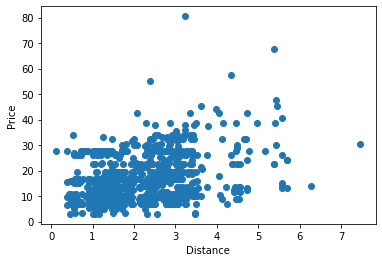

In [ ]:
p_vs_d = rs_data.sample(1000)

plt.scatter(p_vs_d['distance'], p_vs_d['price'])

plt.ylabel("Price")
plt.xlabel("Distance")

Plotting a random sample of 1000 price and distance points, visualizing relationship between price and distance.

In [ ]:
from datetime import datetime
a = datetime.strptime(rs_data['datetime'][1], "%Y-%m-%d %H:%M:%S")
weekday_list = []
for i in range(len(rs_data['datetime'])):
  weekday_list.append(datetime.strptime(rs_data['datetime'][i], "%Y-%m-%d %H:%M:%S").weekday())
rs_data['weekday'] = weekday_list

0-6 corresponds to Monday(0) through Sunday(6)

In [ ]:
rs_data_corr = rs_data.corr()
print(rs_data_corr['price'].sort_values(ascending=False)[:7], '\n')
print(rs_data_corr['price'].sort_values(ascending=True)[:7])

price               1.000000
profit              0.998301
distance            0.345061
ridecost            0.345061
surge_multiplier    0.240458
latitude            0.002088
visibility.1        0.001497
Name: price, dtype: float64 

moonPhase                -0.001602
longitude                -0.001417
windBearing              -0.001382
humidity                 -0.001238
day                      -0.000722
dewPoint                 -0.000615
apparentTemperatureMin   -0.000580
Name: price, dtype: float64
